# ML application

We will now train and compare 2 different models. One will be a MLP model, the other will be a Random Forest. MLP was chosen for it's outstanding ability to classify non linear data, and Random Forests handle high dimensional data well, which would make it suitable for a comparison.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

%matplotlib inline

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data (important for performance, we have values like 350 and values like 0.02, we need to normalize the input
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled, X_test, y, y_test = train_test_split(X, y, test_size=0.1, random_state=123, shuffle=True)

# KFold cross-val with 10 folds with random shuffle
kf = KFold(n_splits=10, shuffle=True, random_state=69)
len(X), len(X_scaled), len(X_test)

(569, 512, 57)

## Training

Let's just try and train one and see what we get

In [3]:
train_losses = []
val_losses = []
fold_acc = []
fold_prec = []
fold_rec = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # uses ReLU by default
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, solver='adam', random_state=69)

    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_val)
    # current fold accuracy
    f_acc = accuracy_score(y_val, y_pred)
    fold_acc.append(f_acc)
    # current fold precision
    f_prec = precision_score(y_val, y_pred)
    fold_prec.append(f_prec)
    # current fold recall
    f_rec = recall_score(y_val, y_pred)
    fold_rec.append(f_rec)
    

    # last training loss
    train_losses.append(mlp.loss_curve_[-1])
    
    y_val_pred_proba = mlp.predict_proba(X_val)
    val_loss = log_loss(y_val, y_val_pred_proba)
    val_losses.append(val_loss)

print(f"Average Accuracy across 10 folds: {np.mean(fold_acc):.4f}")
print(f"Average Precision across 10 folds: {np.mean(fold_prec):.4f}")
print(f"Average Recall across 10 folds: {np.mean(fold_rec):.4f}")

Average Accuracy across 10 folds: 0.9278
Average Precision across 10 folds: 0.9267
Average Recall across 10 folds: 0.9613


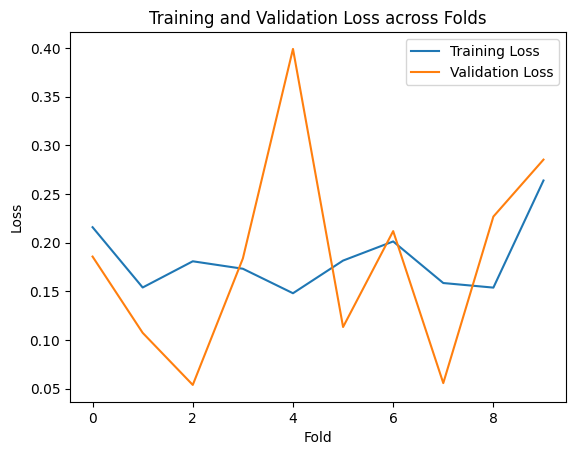

In [4]:
# Plotting training and validation losses across folds
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss across Folds')
plt.show()


Seems like our train and validation losses are very small, which explains the fact that we got 97% accuracy over our 10 folds. Not bad, but let's see how we can adjust the number of layers to finetune our MLP.

In [5]:
num_layers = [x for x in range(1, 15)]
layer_acc = []
layer_prec = []
layer_rec = []
layer_val_loss = []
layer_train_loss = []

for num in num_layers:
    train_losses = []
    val_losses = []
    fold_acc = []
    fold_prec = []
    fold_rec = []
    
    for train_index, val_index in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y[train_index], y[val_index]

        hidden_layer_size = 10*num
        mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), max_iter=1000, solver='adam', random_state=69)
    
        mlp.fit(X_train, y_train)
    
        y_pred = mlp.predict(X_val)
        # current fold accuracy
        f_acc = accuracy_score(y_val, y_pred)
        fold_acc.append(f_acc)
        # current fold precision
        f_prec = precision_score(y_val, y_pred)
        fold_prec.append(f_prec)
        # current fold recall
        f_rec = recall_score(y_val, y_pred)
        fold_rec.append(f_rec)
    
        # last training loss
        train_losses.append(mlp.loss_curve_[-1])
        # validation loss
        y_val_pred_proba = mlp.predict_proba(X_val)
        val_loss = log_loss(y_val, y_val_pred_proba)
        val_losses.append(val_loss)

    print(f"For hidden layer size '{10*num}', we got")
    print(f"Average Train Loss across 10 folds: {np.mean(train_losses):.4f}")
    print(f"Average Val Loss across 10 folds: {np.mean(val_losses):.4f}")
    print(f"Average Accuracy across 10 folds: {np.mean(fold_acc):.4f}")
    print(f"Average Precision across 10 folds: {np.mean(fold_prec):.4f}")
    print(f"Average Recall across 10 folds: {np.mean(fold_rec):.4f}")
    layer_acc.append(np.mean(fold_acc))
    layer_prec.append(np.mean(fold_prec))
    layer_rec.append(np.mean(fold_rec))
    layer_val_loss.append(np.mean(val_losses))
    layer_train_loss.append(np.mean(train_losses))

For hidden layer size '10', we got
Average Train Loss across 10 folds: 0.1599
Average Val Loss across 10 folds: 0.1798
Average Accuracy across 10 folds: 0.9336
Average Precision across 10 folds: 0.9366
Average Recall across 10 folds: 0.9602
For hidden layer size '20', we got
Average Train Loss across 10 folds: 0.1671
Average Val Loss across 10 folds: 0.1818
Average Accuracy across 10 folds: 0.9355
Average Precision across 10 folds: 0.9380
Average Recall across 10 folds: 0.9598
For hidden layer size '30', we got
Average Train Loss across 10 folds: 0.1447
Average Val Loss across 10 folds: 0.1582
Average Accuracy across 10 folds: 0.9277
Average Precision across 10 folds: 0.9507
Average Recall across 10 folds: 0.9345
For hidden layer size '40', we got
Average Train Loss across 10 folds: 0.1375
Average Val Loss across 10 folds: 0.1682
Average Accuracy across 10 folds: 0.9433
Average Precision across 10 folds: 0.9490
Average Recall across 10 folds: 0.9622
For hidden layer size '50', we got
A

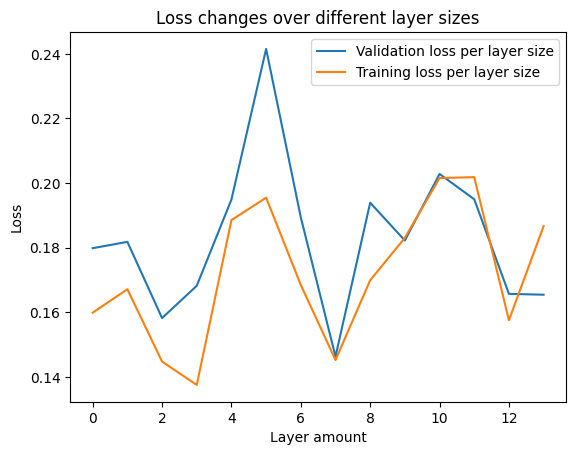

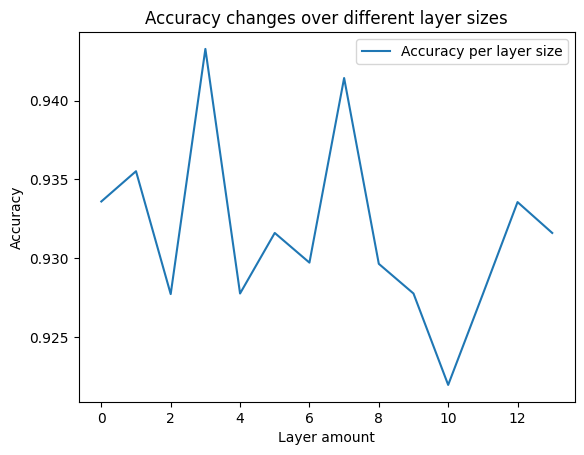

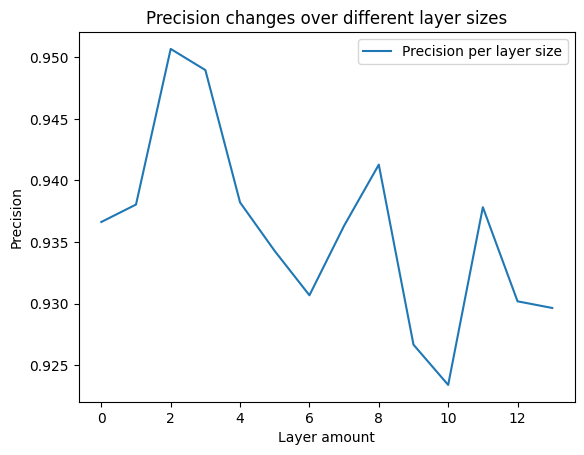

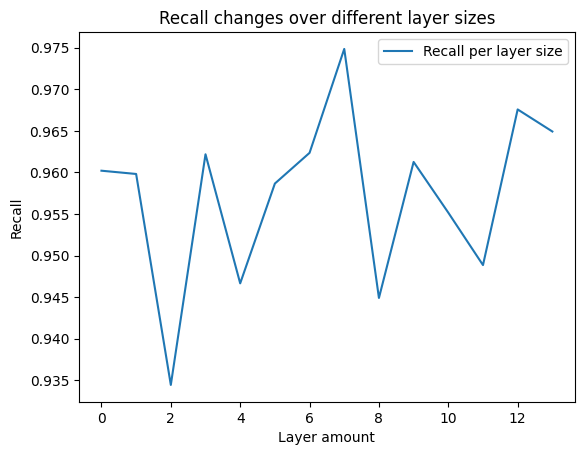

In [6]:
# Plotting training and validation losses across folds
plt.plot(layer_val_loss, label='Validation loss per layer size')
plt.plot(layer_train_loss, label='Training loss per layer size')
plt.xlabel('Layer amount')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss changes over different layer sizes')
plt.show()

plt.plot(layer_acc, label='Accuracy per layer size')
plt.xlabel('Layer amount')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy changes over different layer sizes')
plt.show()

plt.plot(layer_prec, label='Precision per layer size')
plt.xlabel('Layer amount')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision changes over different layer sizes')
plt.show()

plt.plot(layer_rec, label='Recall per layer size')
plt.xlabel('Layer amount')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall changes over different layer sizes')
plt.show()

We seem to be doing allright with a hidden layer size of 8*10 (note that in the loop above, we start at 1 instead of 0, thus the graph is shifted to the left by one.)
There seems to be no benefit to adding more layers. For the time being, hidden_layer_sizes = 80 seems to reach a local maximum, which is also "cheaper" than our initial 100 and more precise.
Precision and Recall are both within a sub 1% range for different layer sizes.

## Feature selection

Let's drop some features that aren't very expressive. From our visual investigation, we can identify:

Best drop candidates:
- mean smoothness
- mean fractal dimensions
- texture error
- smoothness error

Potential drops:
- mean texture
- mean symmetry
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error

Maybe drops:
- worst smoothness
- worst fractal dimension

This is already quiet a large list of features we could drop. Let's test their individual impact to see if we get comparable or even better results.

In [7]:
# The baseline model that we will be comparing against

train_losses = []
val_losses = []
fold_acc = []
fold_prec = []
fold_rec = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]
    # Note we are now using the hidden_layer_size 40
    mlp = MLPClassifier(hidden_layer_sizes=(80,), max_iter=1000, solver='adam', random_state=69)

    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_val)
    # current fold accuracy
    f_acc = accuracy_score(y_val, y_pred)
    fold_acc.append(f_acc)
    # current fold precision
    f_prec = precision_score(y_val, y_pred)
    fold_prec.append(f_prec)
    # current fold recall
    f_rec = recall_score(y_val, y_pred)
    fold_rec.append(f_rec)

    # last training loss
    train_losses.append(mlp.loss_curve_[-1])
    y_val_pred_proba = mlp.predict_proba(X_val)
    val_loss = log_loss(y_val, y_val_pred_proba)
    val_losses.append(val_loss)

print(f"Average Train Loss across 10 folds: {np.mean(train_losses):.4f}")
print(f"Average Val Loss across 10 folds: {np.mean(val_losses):.4f}")
print(f"Average Accuracy across 10 folds: {np.mean(fold_acc):.4f}")
print(f"Average Precision across 10 folds: {np.mean(fold_prec):.4f}")
print(f"Average Recall across 10 folds: {np.mean(fold_rec):.4f}")

Average Train Loss across 10 folds: 0.1452
Average Val Loss across 10 folds: 0.1463
Average Accuracy across 10 folds: 0.9414
Average Precision across 10 folds: 0.9363
Average Recall across 10 folds: 0.9749


In [8]:
from itertools import combinations

X = pd.DataFrame(X_scaled, columns=data.feature_names)

# Columns to drop (see data exploration for column names)
best_drops = [
    "mean smoothness", 
    "mean fractal dimension", 
    "texture error", 
    "smoothness error",
    "worst fractal dimension",
    "worst smoothness" 
]
potential_drops = [
    "mean texture", 
    "mean symmetry", 
    "compactness error", 
    "concavity error", 
    "concave points error", 
    "symmetry error", 
    "fractal dimension error"
]


kf = KFold(n_splits=10, shuffle=True, random_state=69)

# Function that evaluates the model with a single column dropped only
def evaluate_model_with_drop(column_to_drop):
    X_dropped = X.drop(columns=[column_to_drop])

    mlp = MLPClassifier(hidden_layer_sizes=(80,), max_iter=1000, solver='adam', random_state=69)

    # Cross-validation to get accuracy (also does training)
    acc_scores = cross_val_score(mlp, X_dropped, y, cv=kf)

    # Loss
    y_val_pred_proba = cross_val_predict(mlp, X_dropped, y, cv=kf, method='predict_proba')
    
    return np.mean(acc_scores), log_loss(y, y_val_pred_proba)

In [9]:
# Iterate over all drop candidates and evaluate
all_drops = potential_drops + best_drops

for col in all_drops:
    acc, loss = evaluate_model_with_drop(col)
    print(f"Acc: {acc:.4f} || Loss: {loss:.4f} || Dropped: {col}")

Acc: 0.9375 || Loss: 0.1668 || Dropped: mean texture
Acc: 0.9375 || Loss: 0.1766 || Dropped: mean symmetry
Acc: 0.9336 || Loss: 0.1836 || Dropped: compactness error
Acc: 0.9316 || Loss: 0.1817 || Dropped: concavity error
Acc: 0.9316 || Loss: 0.1835 || Dropped: concave points error
Acc: 0.9316 || Loss: 0.1835 || Dropped: symmetry error
Acc: 0.9316 || Loss: 0.1883 || Dropped: fractal dimension error
Acc: 0.9375 || Loss: 0.1808 || Dropped: mean smoothness
Acc: 0.9394 || Loss: 0.1770 || Dropped: mean fractal dimension
Acc: 0.9394 || Loss: 0.1741 || Dropped: texture error
Acc: 0.9316 || Loss: 0.1847 || Dropped: smoothness error
Acc: 0.9472 || Loss: 0.1770 || Dropped: worst fractal dimension
Acc: 0.9453 || Loss: 0.1921 || Dropped: worst smoothness


Seems like both "worst fractal dimension" and "worst smoothness" improve our results. Let's create a power set and check if they when dropped together also improve the accuracy

In [10]:
features = [
    "worst fractal dimension",
    "worst smoothness"
]

power_set = []

for r in range(len(features) + 1):
    for combo in combinations(features, r):
        power_set.append(list(combo))


In [11]:
def evaluate_model_with_multiple_drops(columns_to_drop):
    # Drop the specified columns
    X_dropped = X.drop(columns=columns_to_drop)

    mlp = MLPClassifier(hidden_layer_sizes=(80,), max_iter=1000, solver='adam', random_state=69)

    # Perform cross-validation
    acc_scores = cross_val_score(mlp, X_dropped, y, cv=kf)

    # Loss
    y_val_pred_proba = cross_val_predict(mlp, X_dropped, y, cv=kf, method='predict_proba')
    
    return np.mean(acc_scores), log_loss(y, y_val_pred_proba)

In [12]:
for combination in power_set:
    acc, loss = evaluate_model_with_multiple_drops(combination)
    print(f"Acc: {acc:.4f} || Loss: {loss:.4f} || Dropped: {combination}")

Acc: 0.9414 || Loss: 0.1461 || Dropped: []
Acc: 0.9472 || Loss: 0.1770 || Dropped: ['worst fractal dimension']
Acc: 0.9453 || Loss: 0.1921 || Dropped: ['worst smoothness']
Acc: 0.9414 || Loss: 0.1651 || Dropped: ['worst fractal dimension', 'worst smoothness']


## Conclusion

Great results are possible with the hyperparameter 40 for `hidden_layer_sizes` and also no predictive power is lost when dropping the features:
- mean smoothness
- mean fractal dimensions
- texture error
- smoothness error

- mean texture
- mean symmetry
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error

We noticed that we lost a little performance if we would take out the "maybe drops" features from our model.

After dropping the above listed features, we cut 11 out of 30 features, leaving us with 19. As we see with our "maybe drops" category, we certainly could drop more features and loose only a small amount of predictive power, however the goal of this model is to be as precise as possible with the given data. Cancer classification is a serious matter, and we should not sacrifice accuracy for better performance. 

# Comparing MLP to Random Forest

In [13]:

def evaluate_random_forest_with_column_drop(column_to_drop):
    X_dropped = X.drop(columns=[column_to_drop])

    rf = RandomForestClassifier(n_estimators=100, random_state=69)

    # Get accuracy
    acc_scores = cross_val_score(rf, X_dropped, y, cv=kf)
    
    # Get predicted probabilities for log loss
    y_pred_proba = cross_val_predict(rf, X_dropped, y, cv=kf, method='predict_proba')
    
    # Calculate log loss
    log_loss_val = log_loss(y, y_pred_proba)

    return np.mean(acc_scores), log_loss_val

# Function to evaluate Random Forest after dropping a set of columns
def evaluate_random_forest_with_set_drop(columns_to_drop):
    X_dropped = X.drop(columns=columns_to_drop)

    rf = RandomForestClassifier(n_estimators=100, random_state=69)

    # Get accuracy
    acc_scores = cross_val_score(rf, X_dropped, y, cv=kf)
    
    # Get predicted probabilities for log loss
    y_pred_proba = cross_val_predict(rf, X_dropped, y, cv=kf, method='predict_proba')
    
    # Calculate log loss
    log_loss_val = log_loss(y, y_pred_proba)

    return np.mean(acc_scores), log_loss_val

# Function to evaluate Random Forest without dropping columns
def evaluate_random_forest_no_drops():
    rf = RandomForestClassifier(n_estimators=50, random_state=69)

    # Get accuracy
    acc_scores = cross_val_score(rf, X_scaled, y, cv=kf)
    
    # Get predicted probabilities for log loss
    y_pred_proba = cross_val_predict(rf, X_scaled, y, cv=kf, method='predict_proba')
    
    # Calculate log loss
    log_loss_val = log_loss(y, y_pred_proba)

    return np.mean(acc_scores), log_loss_val



In [14]:
# Zip name of set with set
to_drop = zip(
    ["Best drops", "Potential drops", "Best + Potential", "All drops"],
    [best_drops, potential_drops, best_drops + potential_drops, all_drops]
)

for col in all_drops:
    acc, loss = evaluate_random_forest_with_column_drop(col)
    print(f"Drop: {col} -> Random Forest Accuracy: {acc:.4f}; LOSS: {loss:.4f}")

for drop_set_name, drop_set in to_drop:
    acc, loss = evaluate_random_forest_with_set_drop(drop_set)
    print(f"Drop Set: {drop_set_name} -> Random Forest Accuracy: {acc:.4f}; LOSS: {loss:.4f}")
    
full_acc, loss = evaluate_random_forest_no_drops()
print(f"Random Forest Accuracy with all features: {full_acc:.4f}; LOSS: {loss:.4f}")

Drop: mean texture -> Random Forest Accuracy: 0.9512; LOSS: 0.1204
Drop: mean symmetry -> Random Forest Accuracy: 0.9629; LOSS: 0.1740
Drop: compactness error -> Random Forest Accuracy: 0.9571; LOSS: 0.1776
Drop: concavity error -> Random Forest Accuracy: 0.9590; LOSS: 0.1769
Drop: concave points error -> Random Forest Accuracy: 0.9629; LOSS: 0.1771
Drop: symmetry error -> Random Forest Accuracy: 0.9669; LOSS: 0.1773
Drop: fractal dimension error -> Random Forest Accuracy: 0.9669; LOSS: 0.1769
Drop: mean smoothness -> Random Forest Accuracy: 0.9629; LOSS: 0.1162
Drop: mean fractal dimension -> Random Forest Accuracy: 0.9629; LOSS: 0.1122
Drop: texture error -> Random Forest Accuracy: 0.9590; LOSS: 0.1167
Drop: smoothness error -> Random Forest Accuracy: 0.9610; LOSS: 0.1177
Drop: worst fractal dimension -> Random Forest Accuracy: 0.9590; LOSS: 0.1753
Drop: worst smoothness -> Random Forest Accuracy: 0.9551; LOSS: 0.1127
Drop Set: Best drops -> Random Forest Accuracy: 0.9571; LOSS: 0.17

In [15]:
power_set_v2 = []

features = [
    "symmetry error",
    "fractal dimension error",
    "smoothness error", 
    "mean fractal dimension",
    "mean smoothness"
]

for r in range(len(features) + 1):
    for combo in combinations(features, r):
        power_set_v2.append(list(combo))


for d_s in power_set_v2:
    acc, loss = evaluate_random_forest_with_set_drop(d_s)
    print(f"Drop Set: {d_s} -> Random Forest Accuracy: {acc:.4f}; LOSS: {loss:.4f}")

Drop Set: [] -> Random Forest Accuracy: 0.9551; LOSS: 0.1746
Drop Set: ['symmetry error'] -> Random Forest Accuracy: 0.9669; LOSS: 0.1773
Drop Set: ['fractal dimension error'] -> Random Forest Accuracy: 0.9669; LOSS: 0.1769
Drop Set: ['smoothness error'] -> Random Forest Accuracy: 0.9610; LOSS: 0.1177
Drop Set: ['mean fractal dimension'] -> Random Forest Accuracy: 0.9629; LOSS: 0.1122
Drop Set: ['mean smoothness'] -> Random Forest Accuracy: 0.9629; LOSS: 0.1162
Drop Set: ['symmetry error', 'fractal dimension error'] -> Random Forest Accuracy: 0.9610; LOSS: 0.1129
Drop Set: ['symmetry error', 'smoothness error'] -> Random Forest Accuracy: 0.9571; LOSS: 0.1099
Drop Set: ['symmetry error', 'mean fractal dimension'] -> Random Forest Accuracy: 0.9571; LOSS: 0.1107
Drop Set: ['symmetry error', 'mean smoothness'] -> Random Forest Accuracy: 0.9571; LOSS: 0.1784
Drop Set: ['fractal dimension error', 'smoothness error'] -> Random Forest Accuracy: 0.9590; LOSS: 0.1085
Drop Set: ['fractal dimensio

fractal dimension error, smoothness error drops give us the lowest loss of 0.1085. Therfore, we will drop these 2 features!

## Conclusion

Random forest is achieving a pretty impressive accuracy 96,3% performance

In [16]:
cols_to_drop = ["worst fractal dimension"]

X_test_df = pd.DataFrame(X_test, columns=data.feature_names)
X_train_df = pd.DataFrame(X_scaled, columns=data.feature_names)

X_test_dropped = X_test_df.drop(columns=cols_to_drop)
X_train_dropped = X_train_df.drop(columns=cols_to_drop)

mlp = MLPClassifier(hidden_layer_sizes=(40,), max_iter=1000, solver='adam', random_state=69)
mlp.fit(X_train_dropped, y)

y_pred_train = mlp.predict(X_train_dropped)
train_err = log_loss(y, y_pred_train)
y_pred_test = mlp.predict(X_test_dropped)
test_err = log_loss(y_test, y_pred_test)
test_acc = accuracy_score(y_test, y_pred_test)


train_err, test_err, test_acc

(1.6895462526148668, 3.1617239815015044, 0.9122807017543859)

91% accuracy on our test set for the MLP

In [17]:
cols_to_drop = ["fractal dimension error", "smoothness error"]


X_test_df = pd.DataFrame(X_test, columns=data.feature_names)
X_train_df = pd.DataFrame(X_scaled, columns=data.feature_names)

X_test_dropped = X_test_df.drop(columns=cols_to_drop)
X_train_dropped = X_train_df.drop(columns=cols_to_drop)

rf = RandomForestClassifier(n_estimators=100, random_state=69)
rf.fit(X_train_dropped, y)

y_pred_train = rf.predict(X_train_dropped)
train_err = log_loss(y, y_pred_train)
y_pred_test = rf.predict(X_test_dropped)
test_err = log_loss(y_test, y_pred_test)
test_acc = accuracy_score(y_test, y_pred_test)

train_err, test_err, test_acc

(2.2204460492503136e-16, 0.632344796300301, 0.9824561403508771)

98% accuracy!